# Project 2 - Scientific Computing - Dienhart
## See tests at bottom

In [233]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pa
import matplotlib.collections as col
import matplotlib as mn
import random as ran
plt.style.use('dark_background')
basis_set = np.load("chladni_basis.npy")
Kmat = np.load("Chladni-Kmat.npy")
np.seterr(all="ignore")

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

In [234]:
def lu_factorize(M):
    n = len(M)
    L = np.identity(n)
    Linny = np.identity(n)
    U = np.copy(M)
    
    for i in range(n):
        for j in range(i+1,n):
            rat = float(U[j][i])/U[i][i]
            L[j][i]=rat
            for r in range(i,n):
                if (r < n):
                    U[j][r] -= rat * U[i][r]
                    Linny[j][r]-= rat*Linny[i][r]
    return L, U,Linny
def forward_substitute(L,z):
    sol=np.zeros(len(z))
    for i in range(len(z)):
        tot=0
        for j in range(i):
            tot+=L[i,j]*sol[j]
        sol[i]=(z[i]-tot)/L[i,i]
    return sol.reshape(-1,1)
def back_substitute(U,y):
    n=len(U)
    x = np.zeros(n)
    
    for i in range(n-1, -1, -1):
        tmp = y[i]
        for j in range(n-1, i, -1):
            tmp -= x[j]*U[i,j]
        if (U[i][i] != 0):
            x[i] = tmp/U[i,i]
    x = x[np.newaxis]
    return x.T

In [235]:
# A1-A3 should work with any implementation
A1   = np.array([[1,3],[3,1]]);
eigvals1 = [4,-2];

A2   = np.array([[3,1],[1,3]]);
eigvals2 = [4,2];

A3   = np.array([[1,2,3],[4,3.141592653589793,6],[7,8,2.718281828459045]])
eigvals3 = [12.298958390970709, -4.4805737703355,  -0.9585101385863923];

# A4-A5 require the method to be robust for singular matrices 
A4   = np.array([[1,2,3],[4,5,6],[7,8,9]]);
eigvals4 = [16.1168439698070429897759172023, -1.11684396980704298977591720233, 0]


A5   = np.array([[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15],[16,17,18,19,20],[21,22,23,24,25]]);
eigvals5 = [68.6420807370024007587203237318, -3.64208073700240075872032373182, 0, 0, 0];

# A6 has eigenvalue with multiplicity and is singular
A6  = np.array(
    [[1.962138439537238,0.03219117137713706,0.083862817159563,-0.155700691654753,0.0707033370776169],
       [0.03219117137713706, 0.8407278248542023, 0.689810816078236, 0.23401692081963357, -0.6655765501236198],
       [0.0838628171595628, 0.689810816078236,   1.3024568091833602, 0.2765334214968566, 0.25051808693319155], 
       [-0.1557006916547532, 0.23401692081963357, 0.2765334214968566, 1.3505754332321778, 0.3451234157557794],
       [0.07070333707761689, -0.6655765501236198, 0.25051808693319155, 0.3451234157557794, 1.5441014931930226]]);
eigvals6 = [2,2,2,1,0]
# The functions defined in this file, together with the data file 'chladni-basis.npy'
# allow you to look at your solutions to the Chladni plate problem.
#
# It works quite simply by dotting your coefficient vectors into the set of basis
# functions, defined on a 500x500 grid, then showing the result with pyplot.
#
# show_waves(x) shows the actual wave-functions
# show_nodes(x) shows the wavefunction zeros, where the sand gathers
# show_all_wavefunction_nodes(U,lambdas) shows the zeros of all the eigenfunctions defined by the columns of U

def vector_to_function(x,basis_set):
    return np.sum(x[:,None,None]*basis_set[:,:,:],axis=0) 
    
def show_waves(x,basis_set=basis_set):
    fun = vector_to_function(x,basis_set)
    plt.matshow(fun,origin='lower',extent=[-1,1,-1,1])
    plt.show()

def show_nodes(x,basis_set=basis_set):
    fun   = vector_to_function(x,basis_set)
    nodes = np.exp(-50*fun**2)  
    plt.matshow(nodes,origin='lower',extent=[-1,1,-1,1],cmap='PuBu')
    plt.show()
    

def show_all_wavefunction_nodes(U,lams,basis_set=basis_set):
    idx = np.abs(lams).argsort()
    lams, U = lams[idx], U[:,idx]

    N = U.shape[0]    
    m,n = 5,3
    fig, axs = plt.subplots(m,n,figsize=(15,25))
    
    for k in range(N):
        (i,j) = (k//n, k%n)
        fun = vector_to_function(U[:,k],basis_set)
        axs[i,j].matshow(np.exp(-50*fun**2),origin='lower',extent=[-1,1,-1,1],cmap='PuBu')
        axs[i,j].set_xticklabels([])
        axs[i,j].set_yticklabels([])
        axs[i,j].set_title(r"$\lambda = {:.2f}$".format(lams[k]))
    plt.show()

A. 

In [236]:
def gershgorin(A): 
    n = len(A)
    radius = np.zeros((n,1))
    points = np.zeros((n,1))
    for i in range(n):
        radius[i]=sum(abs(A[i,:]))-abs(A[i,i])
        points[i]=A[i,i]
    return points,radius
        

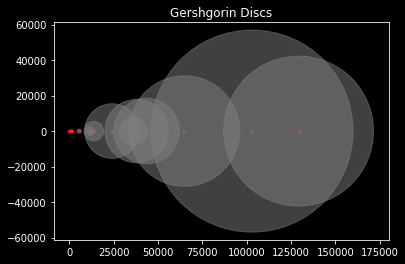

In [237]:
centers,radii = gershgorin(Kmat)
nc = len(centers)
y0 =np.zeros((nc,1))
test = np.concatenate((centers,y0),axis=1)
xc,yc=zip(*test)
fig = plt.figure()
ax = fig.add_subplot()
plt.title("Gershgorin Discs")
for b in range(nc):
    c = pa.Circle((centers[b], 0.2), radii[b], color='grey',alpha=.5)
    ax.add_patch(c)
ax.scatter(xc,yc,c='r',alpha=.7,s=8)
ax.axis('equal')
plt.show()

B

In [238]:
def rng(A):
    eee = np.random.rand(len(A))
    return eee

In [239]:
def norm(M):
    n = 0
    M = np.array(M)
    for i in range(len(M)):
        n += M[i]**(2)
    return n**(0.5)

In [240]:
def ercrit(A,x,v,acc):
    err = 10**(-acc)
    test = A.dot(x)-v*x
    res = (norm(test)/norm(A.dot(x))<err).any()
    return res

In [241]:
def rayleigh_qt(A,x):
    xt = x.conjugate().T
    ral = xt.dot(A).dot(x)/xt.dot(x)
    return ral

In [242]:
def power_iterate(A,x0):
    x = np.random.rand(len(A))
    xn = np.random.rand()
    k = 0
    while(ercrit(A,x,xn,5)==False):
        x = A.dot(x)
        xn = np.linalg.norm(x)
        x = x/xn
        k+=1
    res = norm(A.dot(x)-xn*x)/norm(A.dot(x))
    # for test
    ral = norm(A.dot(x)-rayleigh_qt(A,x)*x)/norm(A.dot(x))
    return x, xn, k, res, ral

In [243]:
vec, val, k1, r1, ral1 = power_iterate(Kmat, rng(Kmat))

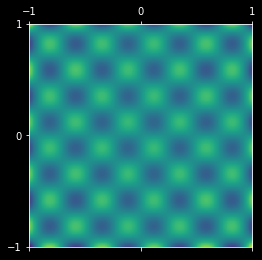

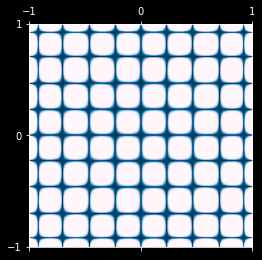

In [244]:
show_waves(vec)
show_nodes(vec)

C

In [245]:
vals, vecs = np.linalg.eig(Kmat)

In [246]:
def ercrit(A,b,u,err):
    err = 10**(-err)
    test = A.dot(b)-u*b
    #res = (np.abs(test)<err).any()
    res = (norm(A.dot(b)-u*b)/norm(A.dot(b))<err).any()
    return res

In [276]:
def rayleigh_iterate(A,b,u):
    n = len(A)
    Id = np.eye(n)
    k = 0
    while(ercrit(A,b,u,6)==False):
        u = b.T.dot(A).dot(b)/np.dot(b.T,b)
        LHS= A-u*Id
        L, U, Lin = lu_factorize(LHS)
        newB = forward_substitute(L,b)
        newB = back_substitute(U,newB)
        bn= np.linalg.norm(newB)
        b = newB/bn
        k+=1
    residual = norm(A.dot(b)-u*b)/norm(A.dot(b))
    return u, b, k, residual

D

In [277]:
val_list = np.zeros((len(Kmat),1))
vec_list = []
r_list = np.zeros((len(Kmat),1))
k_list = np.zeros((len(Kmat),1))
for i in range(len(Kmat)):
    #val_list[i], vec_list[i], k[i], r_list[i]  = r(Kmat,vecs[i]-np.random.rand(),vals[i]-np.random.rand())
    val, vec, k, r3 = rayleigh_iterate(Kmat,vecs[i],round(vals[i]))
    val_list[i] = val
    vec_list.append(vec[:,0])
    k_list[i] = k
    r_list[i] = r3
vec_list = np.transpose(vec_list)

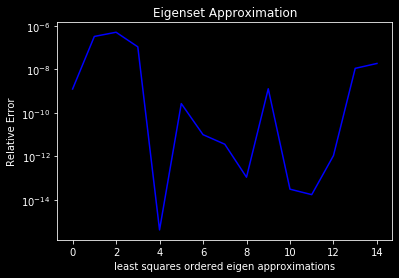

In [278]:
plt.plot(r_list,c='blue')
plt.xlabel("least squares ordered eigen approximations")
plt.title("Eigenset Approximation")
plt.ylabel("Relative Error")
plt.yscale('log')

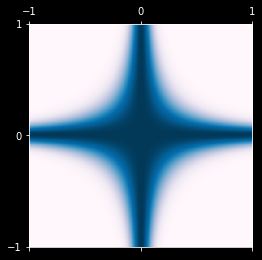

In [279]:
show_nodes(vec_list[-1])

For 4, basically power iteration relies on a dominant balance of a given eigenvalue relative to the others, in that as we take lambda_1 to be the first value, and factor it out of both sides, and the series means we have lambda_k/lambda_1)^k so everything else is minimized while lambda_1 becomes bigger.

In [280]:
T = np.copy(vec_list)
Tinv = np.linalg.inv(T)
Diag = np.eye(len(Kmat))
for i in range(len(Kmat)):
    Diag[i,i]=val_list[i]

In [281]:
rr = np.squeeze(val_list)

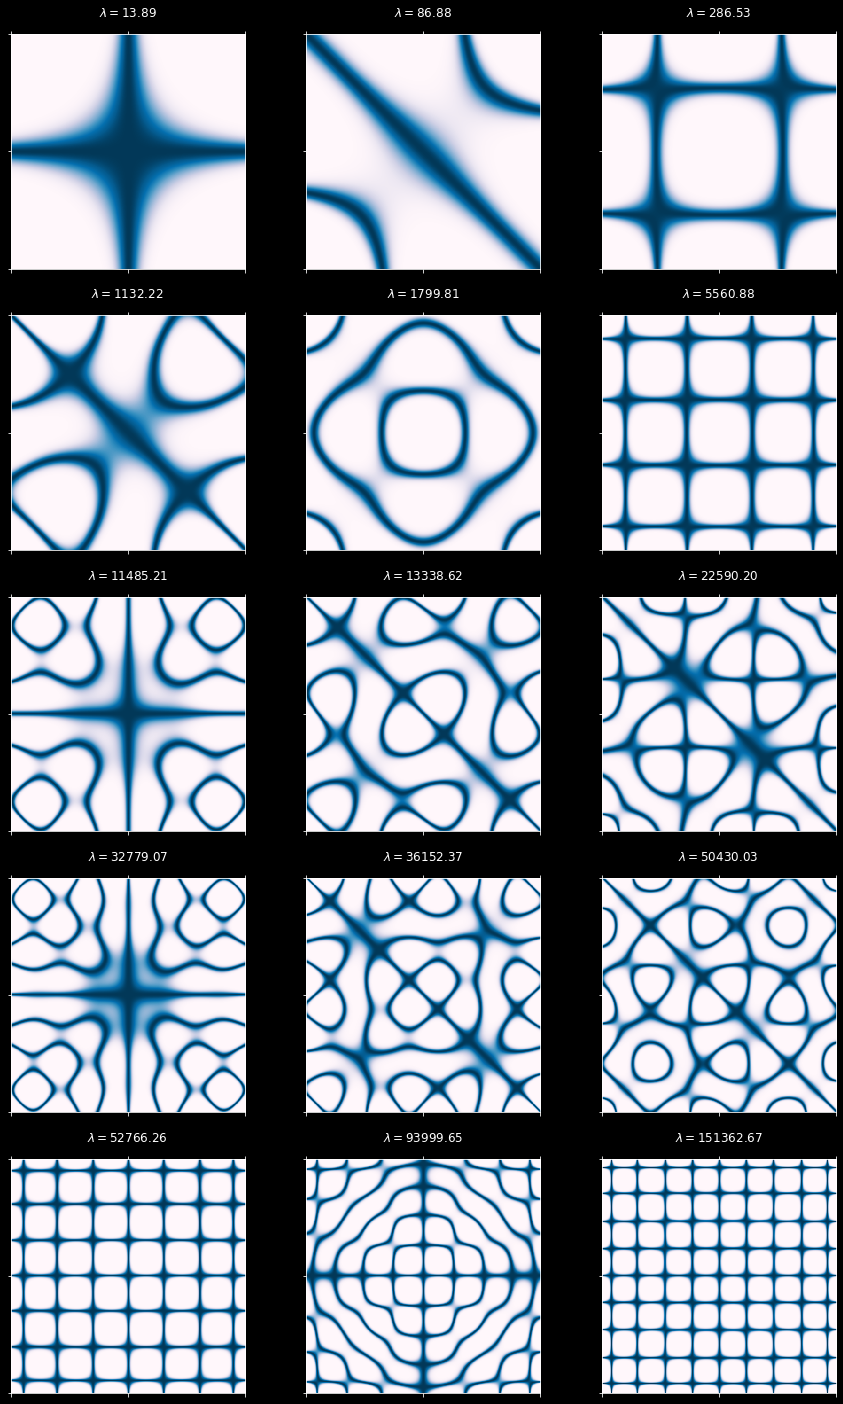

In [282]:
show_all_wavefunction_nodes(T,rr)

Tests

In [283]:
A1   = np.array([[1,3],[3,1]]);
eigvals1 = [4,-2];
A2   = np.array([[3,1],[1,3]]);
eigvals2 = [4,2];
A3   = np.array([[1,2,3],[4,3.141592653589793,6],[7,8,2.718281828459045]])
eigvals3 = [12.298958390970709, -4.4805737703355,  -0.9585101385863923];
A4   = np.array([[1,2,3],[4,5,6],[7,8,9]]);
eigvals4 = [16.1168439698070429897759172023, -1.11684396980704298977591720233, 0]
A5   = np.array([[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15],[16,17,18,19,20],[21,22,23,24,25]]);
eigvals5 = [68.6420807370024007587203237318, -3.64208073700240075872032373182, 0, 0, 0];
A6  = np.array(
    [[1.962138439537238,0.03219117137713706,0.083862817159563,-0.155700691654753,0.0707033370776169],
       [0.03219117137713706, 0.8407278248542023, 0.689810816078236, 0.23401692081963357, -0.6655765501236198],
       [0.0838628171595628, 0.689810816078236,   1.3024568091833602, 0.2765334214968566, 0.25051808693319155], 
       [-0.1557006916547532, 0.23401692081963357, 0.2765334214968566, 1.3505754332321778, 0.3451234157557794],
       [0.07070333707761689, -0.6655765501236198, 0.25051808693319155, 0.3451234157557794, 1.5441014931930226]]);
eigvals6 = [2,2,2,1,0]

In [284]:
ve1, va1, ka1, ra1, ral1 = power_iterate(A1,rng(A1))
ve2, va2, ka2, ra2, ral2 = power_iterate(A2,rng(A2))
ve3, va3, ka3, ra3, ral3 = power_iterate(A3,rng(A3))
ve4, va4, ka4, ra4, ral4 = power_iterate(A4,rng(A4))
ve5, va5, ka5, ra5, ral5 = power_iterate(A5,rng(A5))
ve6, va6, ka6, ra6, ral6 = power_iterate(A6,rng(A6))

In [285]:
print("Eigenvalues, Iteration Count, and Rayleigh Residuals using Power Method")
[[va1, ka1, ral1],[va2, ka2, ral2],[va3, ka3, ral3],[va4, ka4, ral4],[va5, ka5, ral5],[va6, ka6, ral6]]

Eigenvalues, Iteration Count, and Rayleigh Residuals using Power Method


[[3.9999999999301634, 14, 5.117499156417789e-06],
 [3.9999999986335966, 16, 7.545428864061672e-06],
 [12.298921766805677, 10, 5.048170103545065e-06],
 [16.11694011693352, 5, 1.4542959283354245e-06],
 [68.64219591450923, 5, 2.27528566184896e-07],
 [1.9999999995756128, 12, 5.946900603187359e-06]]

Text(0.5, 1.0, 'Accuracy of Eigenvalue Estimate using Power Method')

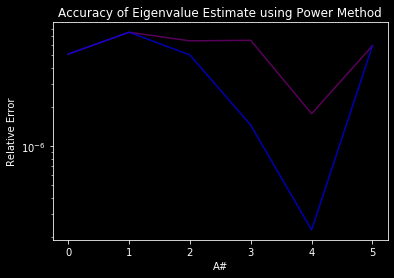

In [286]:
RR = np.asmatrix([ral1,ral2,ral3,ral4,ral5,ral6]).T
Ra = np.asmatrix([ra1,ra2,ra3,ra4,ra5,ra6]).T
plt.plot(Ra,c='purple',alpha=.7)
plt.plot(RR,c='b',alpha=.7)
plt.ylabel("Relative Error")
plt.yscale('log')
plt.xlabel("A#")
plt.title("Accuracy of Eigenvalue Estimate using Power Method")

In [288]:
rva1, rve1, rka1, rral1 = rayleigh_iterate(A1,rng(A1),1)
rva2, rve2, rka2, rral2 = rayleigh_iterate(A2,rng(A2),1)
rva3, rve3, rka3, rral3 = rayleigh_iterate(A3,rng(A3),1)
rva4, rve4, rka4, rral4 = rayleigh_iterate(A4,rng(A4),1)
rva5, rve5, rka5, rral5 = rayleigh_iterate(A5,rng(A5),1)
rva6, rve6, rka6, rral6 = rayleigh_iterate(A6,rng(A6),1)

In [289]:
print("Eigenvalues, Iteration Count, and Rayleigh Residuals using Rayleigh Iteration")
[[(rva1), rka1, rral1],[rva2, rka2, rral2],[rva3, rka3, rral3],[rva4, rka4, rral4],[rva5, rka5, rral5],[rva6, rka6, rral6]]

Eigenvalues, Iteration Count, and Rayleigh Residuals using Rayleigh Iteration


[[array([[3.99999965]]), 2, array([8.69912292e-08])],
 [array([[4.]]), 4, array([1.38012697e-11])],
 [array([[12.29895839]]), 5, array([8.0789965e-11])],
 [array([[16.11684595]]), 5, array([1.22805561e-07])],
 [array([[68.64208074]]), 4, array([2.14071809e-12])],
 [array([[1.9999999]]), 2, array([4.95994639e-08])]]

Text(0.5, 1.0, 'Accuracy of Eigenvalue Estimate using Rayleigh Iteration')

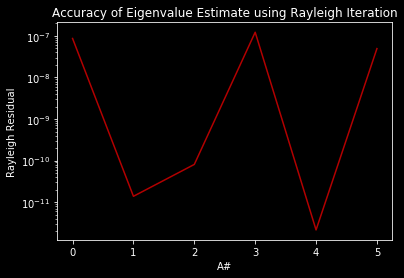

In [290]:
rRR = [rral1,rral2,rral3,rral4,rral5,rral6]
np.asmatrix(rRR)
plt.plot(rRR,c='r',alpha=.7)
plt.ylabel("Rayleigh Residual")
plt.yscale('log')
plt.xlabel("A#")
plt.title("Accuracy of Eigenvalue Estimate using Rayleigh Iteration")

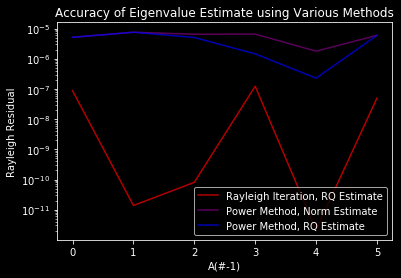

In [291]:
plt.plot(rRR,c='r',alpha=.7,label='Rayleigh Iteration, RQ Estimate')
plt.plot(Ra,c='purple',alpha=.7, label = 'Power Method, Norm Estimate')
plt.plot(RR,c='b',alpha=.7, label = 'Power Method, RQ Estimate')
plt.ylabel("Rayleigh Residual")
plt.yscale('log')
plt.xlabel("A(#-1)")
plt.title("Accuracy of Eigenvalue Estimate using Various Methods")
plt.legend(loc="lower right")